The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. In order to reduce churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

##### Download the data

In [1]:
!pip install seaborn --upgrade
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 981 kB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 22.3 MB 38 kB/s eta 0:00:0101


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [3]:
#downloading the dataset
churn = pd.read_csv('/datasets/gym_churn_us.csv')
print(churn.shape)
churn.head()

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


##### Carry out exploratory data analysis (EDA)

In [4]:
#changing column names to lowercase
churn.columns = churn.columns.str.lower()
churn.info()
display(churn.describe())
dup = churn.duplicated().sum()
display(dup) # there is no duplicates
display(churn.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


0

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3256,1,1,1,1,1,1,0,25,6.288000,1.0,1,0.740237,0.000000,1
3403,1,1,1,1,1,12,0,31,48.275460,11.0,6,1.894392,1.901030,0
1095,1,1,1,1,1,6,1,30,342.374838,6.0,2,2.338265,2.362191,0
3345,1,1,0,1,1,6,1,30,218.944562,5.0,2,1.078409,1.130023,0
3112,0,0,0,0,1,1,0,25,124.027677,1.0,2,0.888560,0.863438,1


In [5]:
#study the mean feature parameters for those who stayed and for those who left
churn.groupby('churn').agg({i:'mean' for i in churn.columns})

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1


Creating a dataframe copy for plotting graphs

In [6]:
df = churn
df['label'] = churn['churn'].replace({0:'Stayed', 1:'Left'})

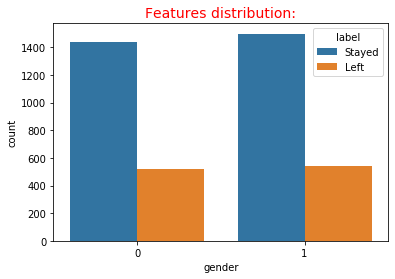

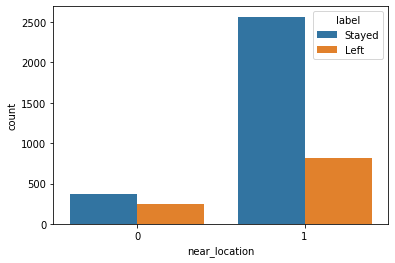

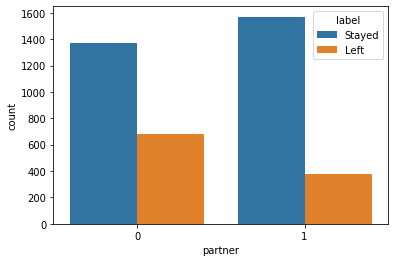

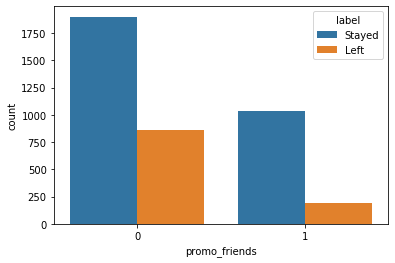

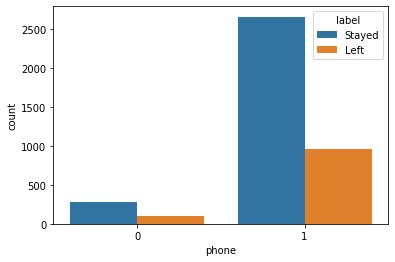

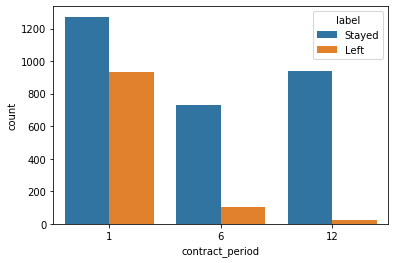

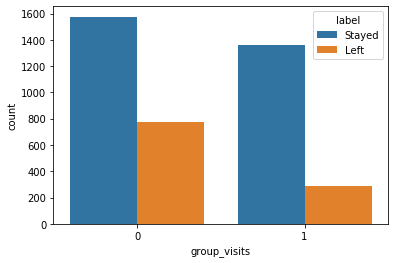

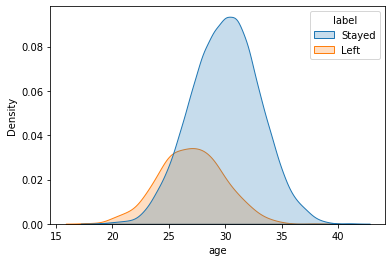

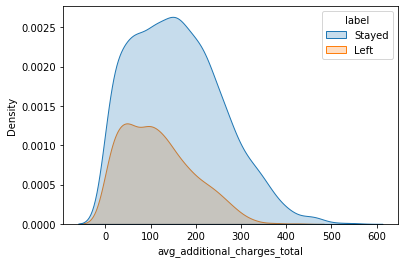

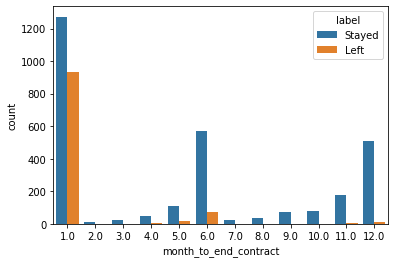

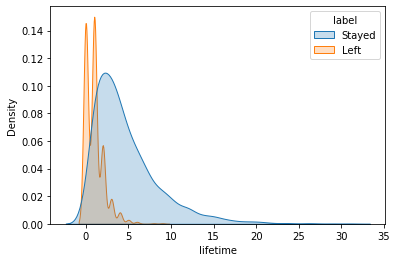

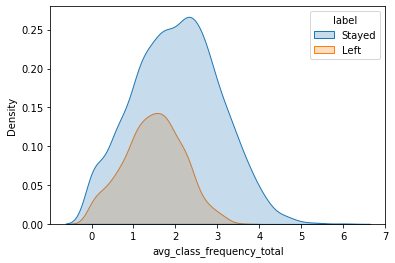

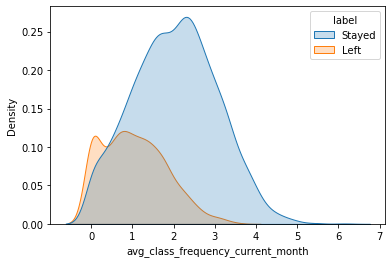

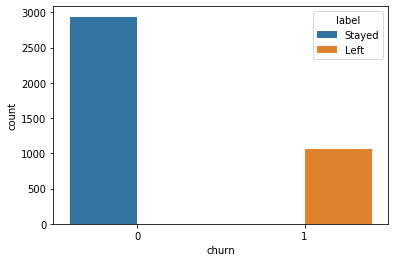

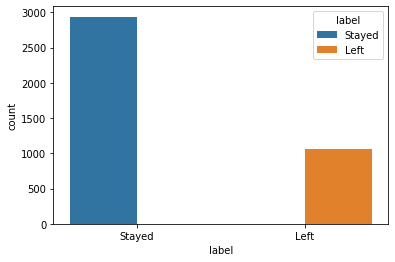

In [7]:
hist = ['age', 'lifetime', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
plt.title('Features distribution:', color = 'red', size = 14)
for i in df.columns:
    if i in hist:
        sns.kdeplot(x=i, data=df, hue='label', shade=True)
        plt.show()    
    else:
        sns.countplot(x=i, data=df, hue='label')
        plt.show()

All this graphs help us to figure out which features are important to build loyal users profile. Let’s have a look at features distribution graphs. Gender graph shows that it doesn't matter what sex you are if you will stay or leave. 
One of the main reasons for users decision to stay or leave is the gym location. Obviously as more the gym near to you it makes it easy for coming as we can see it clear from the graph. Other important feauter is contract period. Churn rate is very high for users with one-month contract and we also see that mostly users leave after first or second month, on the other hand users who have 12 month contract are most unlikely to leave. Let’s have a look at the age clear normal distribution graph and figure out that users around 30 years old are most loyal users. We can also notice that promo friends and partner deals users are more likely to stay and its a good reasion to keep this deals running.

Building a correlation matrix

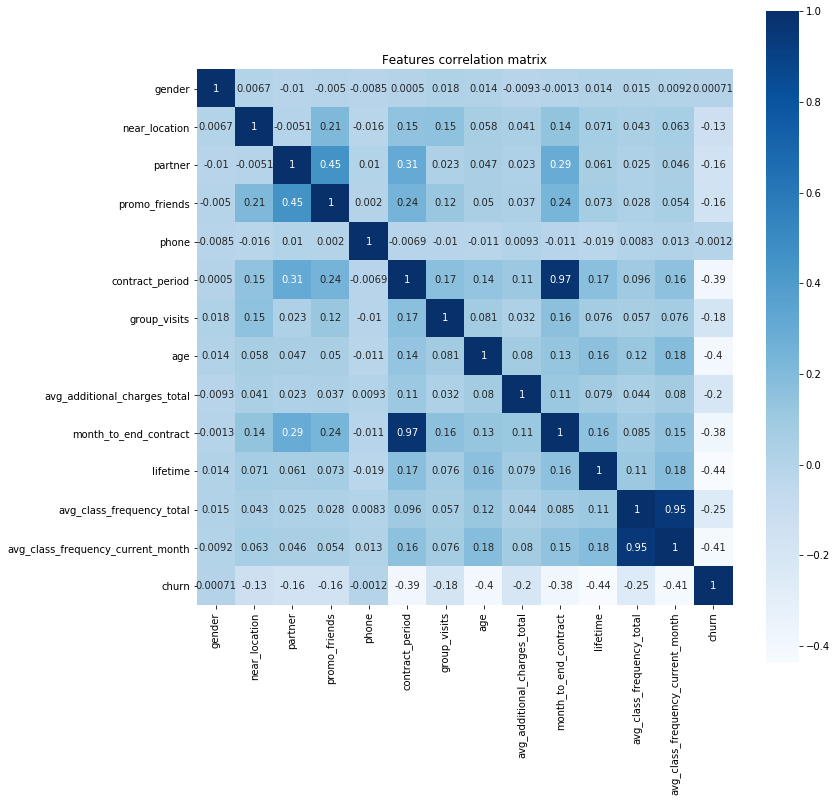

In [8]:
corr_m = churn.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_m, annot=True, square=True, cmap="Blues")
plt.title('Features correlation matrix')
plt.show()

After downloading and analyzing the data no missing or duplicate values were detected, looking at the mean feature values in two groups my main conclusions are: there is no gender difference for staying or leaving, on average most of the customers staying if they have more than 5 months remaining until the contract expires, "bring a friend" offer works cause almost twice customers stay after this offer than just customers, same for whether the user is an employee of a partner company, on average customers who won't stay leave after first month.
After plotting distribution graphs I can get some more interesting insights users who live or work in the neighborhood and as follow there is much more of them who will stay, same for users who provided their phone number, seems like they have much more serious intent.
Users who are staying for 12 month are most unlikely to leave.
Correlation matrix gives us important information about two pair of features with strong mutual correlation:   'contract_period' & 'month_to_end_contract', and 'avg_class_frequency_current_month' & 'avg_class_frequency_total',
mutual correlation is undesirable with linear models, so we need to pay special attention to this.

##### Build a binary classification model for customers where the target feature is the user's leaving next month.

In [9]:
#dropping features with multicollinearity 
churn = churn.drop(['month_to_end_contract', 'avg_class_frequency_current_month', 'label'], axis=1)

In [10]:
X = churn.drop('churn', axis=1)
y = churn['churn']

In [11]:
#dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# standardize the data 
scaler = StandardScaler()
# train the scaler on the train set using the fit method
scaler.fit(X_train)
# standardize the train set using the transform scaler method
X_train_st = scaler.transform(X_train)
# standardize the validation set using the transform scaler method
X_test_st = scaler.transform(X_test)

In [13]:
#defining list of models we would like to check
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

In [14]:
#creating a function for training model, making prediction and printing out metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred),
                                                                  precision_score(y_test, y_pred),
                                                                  recall_score(y_test, y_pred)))

In [15]:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
Accuracy:0.90 Precision:0.79 Recall:0.81
RandomForestClassifier(random_state=0)
Accuracy:0.89 Precision:0.79 Recall:0.76


First of all, we're going to solve a binary classification task here 
we want to predict if the user will stay or leave, 0 or 1, so we will start with simple LogisticRegression model. Side-by-side we would like to check more powerful algorithm, so we will go with RandomForestClassifier. We divided the dataset we had into train and validation(test) data with proportion of 80/20. This is a simpler approach, but it's good enough for us at this point. After that we standardized feature matrices of both train and test data, and trained our models, made predictions and printed out important metrics, such as accuracy, precision and recall scores, as we can see LogisticRegression model has slightly better performance by accuracy and recall metrics.

##### Create user clusters

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(churn)

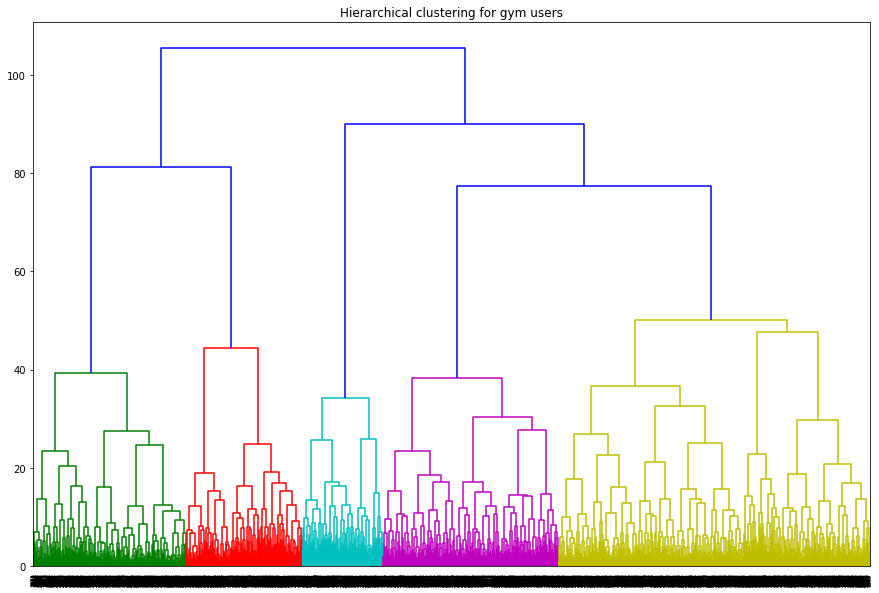

In [17]:
#visualizing hierarchy
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym users')
plt.show()

Hierarchical clustering groups together the data points with similar characteristics. Dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points, observations are allocated to clusters by drawing a horizontal line through the dendrogram and observations that are joined together below the line are in clusters.

In [18]:
#defining the k_means model with 5 clusters
km = KMeans(n_clusters=5, random_state=0)

In [19]:
# predict the clusters for observations (0 to 4)
labels = km.fit_predict(X_sc)

In [20]:
#storing cluster labels in the field of our dataset
churn['cluster_km'] = labels

In [21]:
#studyinf the mean feature parameters for clusters
churn.groupby('cluster_km').agg({i:'mean' for i in churn.columns})

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
cluster_km,,,,,,,,,,,,,
0,0.501661,0.000000,0.481728,0.071429,0.911960,2.872093,0.224252,28.652824,135.994298,2.976744,1.754128,0.408638,0
1,0.522936,0.999083,0.161468,0.074312,0.902752,2.068807,0.450459,30.055963,157.510111,4.833945,2.043382,0.001835,1
2,0.503205,0.992521,0.916667,1.000000,0.903846,7.827991,0.544872,29.950855,159.006129,4.708333,2.011738,0.011752,2
3,0.502627,0.984238,0.626970,0.000000,0.900175,10.623468,0.492119,29.996497,164.623351,4.654991,2.035830,0.005254,3
4,0.513109,1.000000,0.330836,0.217228,0.900125,1.682896,0.289638,26.922597,114.095697,0.965044,1.482348,0.997503,4


##### Plot distributions of features for the clusters

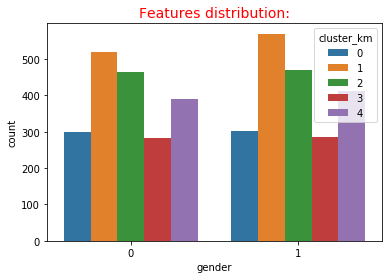

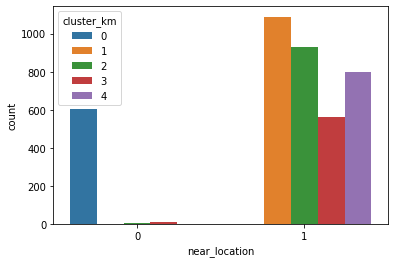

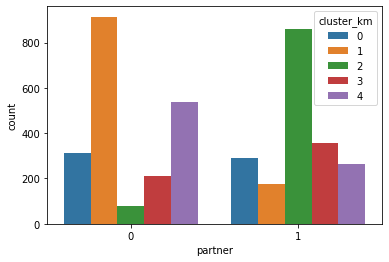

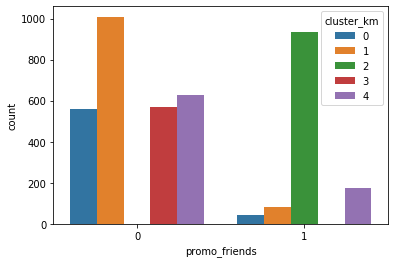

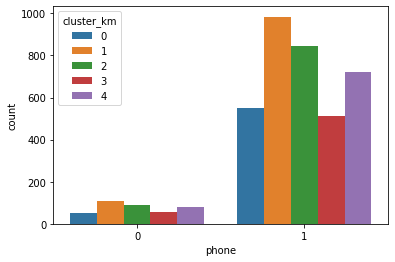

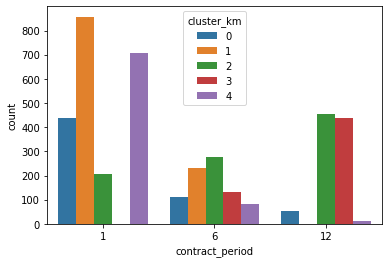

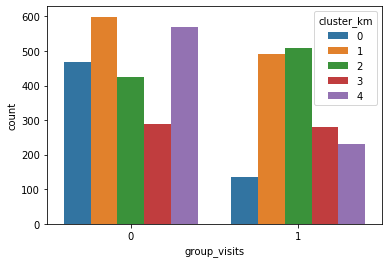

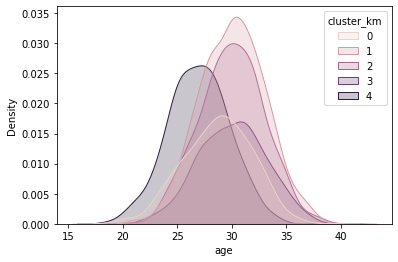

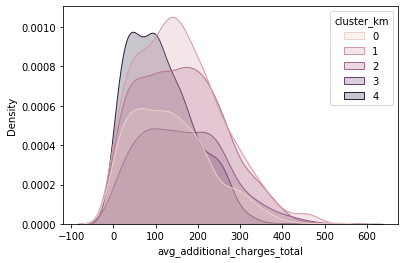

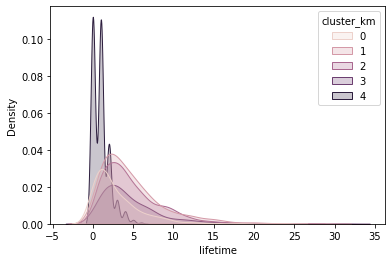

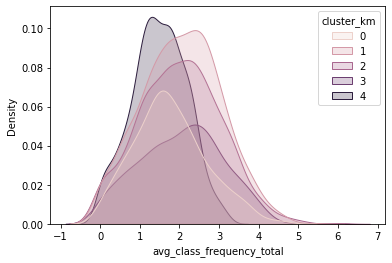

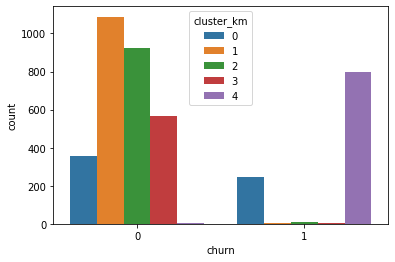

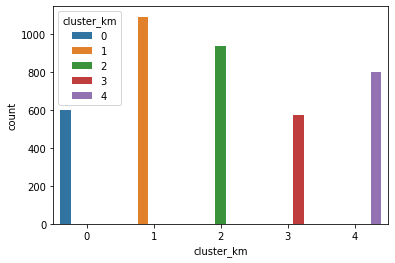

In [22]:
hist = ['age', 'lifetime', 'avg_additional_charges_total', 'avg_class_frequency_total']
plt.title('Features distribution:', color = 'red', size = 14)
for i in churn.columns:
    if i in hist:
        sns.kdeplot(x=i, data=churn, hue="cluster_km", shade=True)
        plt.show()    
    else:
        sns.countplot(x=i, data=churn, hue="cluster_km")
        plt.show()

We can see where each cluster located on the graph and after figure out the churn rate if we look at cluster N 4 with the highest churn rate we can easily identify the features that are typical for users churn.
Let’s have a look at near location graph, all cluster 4 users are not located near the gym, if we look at the contract period graph most of them had one month contract period and they barely used group visits and had promo friend deal. So now we can build a typical churn user profile and offer that users to visit more group training and may be some extra deals for bringing their friends to the gym. 

In [23]:
churn_rate = churn.groupby(['cluster_km']).agg({'age':'count', 'churn':'sum'}).reset_index()
churn_rate.columns = ['cluster', 'total_users', 'churn_users']
churn_rate['churn_rate %'] = ((churn_rate['churn_users'] / churn_rate['total_users']) * 100).round(2)
churn_rate

,cluster,total_users,churn_users,churn_rate %
0,0,602,246,40.86
1,1,1090,2,0.18
2,2,936,11,1.18
3,3,571,3,0.53
4,4,801,799,99.75


First of all I standardized the data. Then I used agglomerative hierarchical clustering to plot dendrogram to see how many clusters we have. On the dendrogram I see it's clearly 5 clusters. Then I used K Means model to divide our users into 5 clusters.
As we can see 'near_location' are important parameters for dividing into clusters, the 0 cluster contains people who are not living close to the gym and their churn_rate is around 40% that can be explained by their location but users who are live or work in the neighborhood - churn 4 and has around two month left for membership have very high churn rate almost 99.75% that can indicate about a problem. If I check it out more deeply they have low group sessions visits, they are mostly under 30 years old and have very short 'Lifetime' as users.
The most loyal clusters are N-2 and N-3, they all have on average long contract period. Users of cluster N-3 have the most long contract period and no "bring a friend" offer although they are most loyal, users of cluster N-2 are all have "bring a friend" offer and very hight "employee of a partner company offer" thats mean they all have discount.

##### Come up with conclusions and basic recommendations on working with customers

Taking all into account one of the main options to reduce the churn rate is to offer more long 'contract period', whether the user takes part in group sessions is also very important for keep the churn rate low. This one of the main reasons that make the gym interesting and needs special attention. "Promo friends" and "Partner" offers are good but how much they profitable? I would recommend to check it out, make the gym more attractive for younger users under 30 years old, may be more modern music and tv-screens.
Digitizing customer profiles definitely makes things clear and help to see the picture, it's give you a good start for action but needs to be maintained on monthly basis in order to see if we are moving in right direction.
                                       Thank you for reading.